#Интервальные числа

a' + b' = [a1, a2] + [b1, b2] = [a1 + b1, a2 + b2];<br>
a' - b' = [a1, a2] - [b1, b2] = [a1 - b1, a2 - b2];<br>
k * a' = k * [a1, a2] = {[k * a1, k * a2], k > 0; [k * a2, k * a1], k < 0};<br>


In [ ]:
a = [2, 4]
b = [3, 5]
k = 3
def calcul(a, oper, b = [] , k = 0.1):
    answer = []
    if oper == '+':
        for i in range(2):
            answer.append(a[i] + b[i])
        return answer
    elif oper == '-':
        for i in range(2):
            answer.append(a[i] - b[i])
        return answer
    elif oper == 'k':
        if k > 0:
            for i in a:
                answer.append(k * i)
        else:
            for i in a[::-1]:
                answer.append(k * i)
        return answer
    elif oper == '*':
        temp = []
        for i in a:
            for j in b:
                temp.append(i * j)
        return [min(temp), max(temp)]
    elif oper == '/':
        b = [1 / i for i in b][::-1]
        return calcul(a, '*', b)


print(calcul(a, '+', b))
print(calcul(a, '-', b))
print(calcul(a, '*', b))
print(calcul(a, '/', b))
print(calcul(a, 'k', k=3))
print(calcul(a, 'k', k=-3))

[5, 9]
[-1, -1]
[6, 20]
[0.4, 1.3333333333333333]
[6, 12]
[-12, -6]


e = a = [a1, a2]
xi = b = [b1, b2]
m = const

In [ ]:
def a1(a, b, k):
    a_sqrt = calcul(a, '*', a)
    b_sqrt = calcul(b, '*', b)
    first = calcul(a_sqrt, 'k', k=k**2)
    second = calcul(calcul(a, '*', b), 'k', k=(2 * k * (k - 1)))
    third = calcul(b_sqrt, 'k', k=k**2)
    answer = calcul(calcul(calcul(first, '-', second), '+', third), 'k', k=0.5)
    return answer

print(a1(a, b, k))

def a2(a, b, k):
    answer = calcul(calcul(a, '-', b), 'k', k=k)
    return answer

print(a2(a, b, k))

[22.5, 64.5]
[-3, -3]


#Нечеткие числа

Функция определения

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

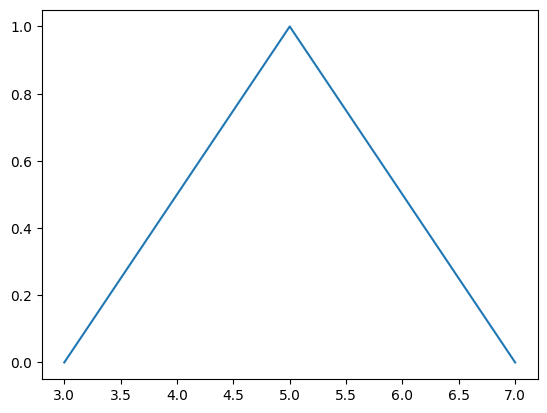

In [ ]:
a, b, c = 3, 5, 7
def func(x, a, b, c):
    if x <= a:
        return 0
    elif a <= x <= b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return (c - x) / (c - b)
    elif c <= x:
        return 0


ans_arr = []
for i in np.arange(a, c + 1):
    ans_arr.append(func(i, a, b, c))

x = [i for i in np.arange(a, c + 1)]
y = np.array(ans_arr)
plt.plot(x, ans_arr)


Операции с нечеткими числами

In [ ]:
def ver(left, number, right):
    ver = []
    for i in np.arange(left, right+1):
        ver.append(round(func(i, left, number, right), 3))
    x = [round(i, 3) for i in np.arange(left, right + 1)]
    return ver, x


def fuzzy_calcul(ver_a, x_a, oper, ver_b, x_b):
    a = x_a
    b = x_b
    a_x = ver_a
    b_x = ver_b
    dct = {}
    x, y = [], []
    diap_a = len(a)
    diap_b = len(b)
    if oper == '+':
        for i in range(1, diap_a-1):
            for j in range(1, diap_b-1):
                operation = a[i] + b[j]
                if operation not in dct:
                    dct.update({operation: []})
                mn = min(a_x[i], b_x[j])
                dct[operation].append(mn)
        for i in dct:
            x.append(i)
            y.append(max(dct.get(i)))
        return x, y
    elif oper == '-':
        for i in range(1, diap_a-1):
            for j in range(i, diap_b-1):
                operation = a[i] - b[j]
                if operation not in dct:
                    dct.update({operation: []})
                mn = min(a_x[i], b_x[j])
                dct[operation].append(mn)
        for i in dct:
            x.append(i)
            y.append(max(dct.get(i)))
        return x, y
    if oper == '*':
        for i in range(1, diap_a-1):
            for j in range(i, diap_b-1):
                operation = round(a[i] * b[j], 4)
                if operation not in dct:
                    dct.update({operation: []})
                mn = min(a_x[i], b_x[j])
                dct[operation].append(mn)
        for i in dct:
            x.append(i)
            y.append(max(dct.get(i)))
        N = len(x)
        for i in range(N - 1):
            for j in range(N - i - 1):
                if x[j] > x[j + 1]:
                    x[j], x[j + 1] = x[j + 1], x[j]
                    y[j], y[j + 1] = y[j + 1], y[j]
        return x, y
    if oper == '/':
        for i in range(1, diap_a-1):
            for j in range(i, diap_b-1):
                operation = round(a[i] / b[j], 4)
                if operation not in dct:
                    dct.update({operation: []})
                mn = min(a_x[i], b_x[j])
                dct[operation].append(mn)
        for i in dct:
            x.append(i)
            y.append(max(dct.get(i)))
        N = len(x)
        for i in range(N - 1):
            for j in range(N - i - 1):
                if x[j] > x[j + 1]:
                    x[j], x[j + 1] = x[j + 1], x[j]
                    y[j], y[j + 1] = y[j + 1], y[j]
        return x, y


left_a, a, right_a = 1, 4, 9
left_b, b, right_b = 23, 26, 31
ver_a, x_a = ver(left_a, a, right_a)
ver_b, x_b = ver(left_b, b, right_b)

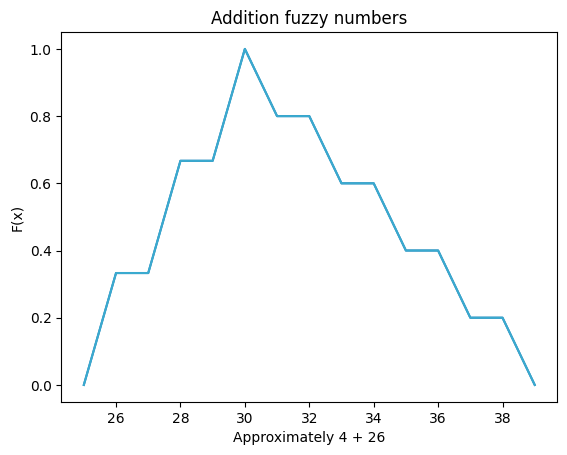

In [ ]:
x, y = fuzzy_calcul(ver_a, x_a, '+', ver_b, x_b)
x = np.insert(x, 0, x[0] - (x[1] - x[0]))
x = np.append(x, x[-1] + (x[1] - x[0]))
y = np.insert(y, 0, 0)
y = np.append(y, 0)
plt.plot(x, y)

plt.title('Addition fuzzy numbers', fontsize=12)
plt.xlabel(f'Approximately {a} + {b}')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

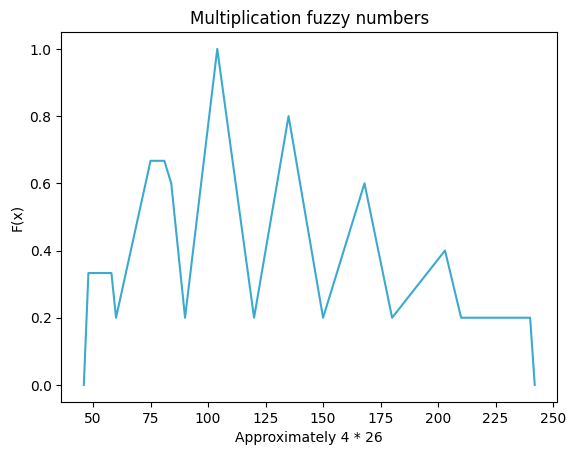

In [ ]:
x, y = fuzzy_calcul(ver_a, x_a, '*', ver_b, x_b)
x = np.insert(x, 0, x[0] - (x[1] - x[0]))
x = np.append(x, x[-1] + (x[1] - x[0]))
y = np.insert(y, 0, 0)
y = np.append(y, 0)

plt.title('Multiplication fuzzy numbers', fontsize=12)
plt.xlabel(f'Approximately {a} * {b}')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

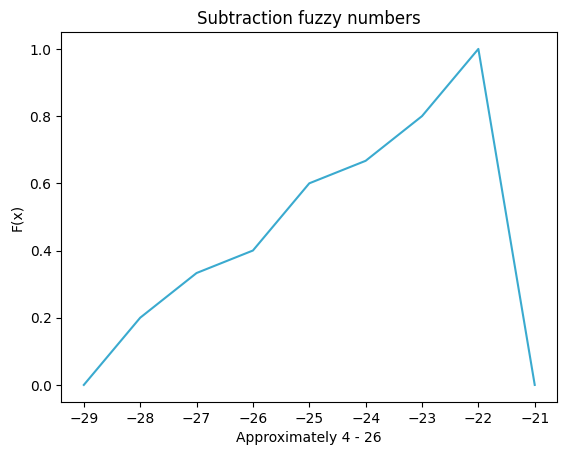

In [ ]:
x, y = fuzzy_calcul(ver_a, x_a, '-', ver_b, x_b)
x = np.insert(x, 0, x[0] - (x[1] - x[0]))
x = np.append(x, x[-1] + (x[1] - x[0]))
y = np.insert(y, 0, 0)
y = np.append(y, 0)

plt.title('Subtraction fuzzy numbers', fontsize=12)
plt.xlabel(f'Approximately {a} - {b}')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

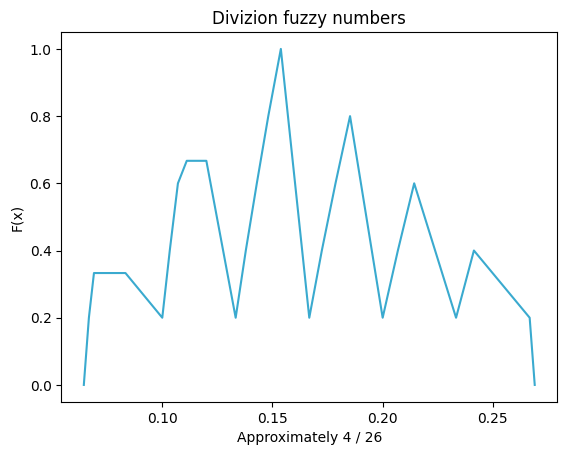

In [ ]:
x, y = fuzzy_calcul(ver_a, x_a, '/', ver_b, x_b)
x = np.insert(x, 0, x[0] - (x[1] - x[0]))
x = np.append(x, x[-1] + (x[1] - x[0]))
y = np.insert(y, 0, 0)
y = np.append(y, 0)
plt.title('Divizion fuzzy numbers', fontsize=12)
plt.xlabel(f'Approximately {a} / {b}')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()